# Analisi predittiva dei dati tramite gradient boosting e feature engineering

**Obiettivo**: cercare di stimare i dati telefonici attraverso i dati delle presenze pedonali a Dozza e viceversa.

Per il conseguimento di tale obiettivo, e' stata usata come tecnica quella del gradient boosting, la quale ci permette di ottenere un modello forte tramite la combinazione di diversi modelli deboli. Ci viene molto in aiuto nel nostro caso in quanto funziona bene con tanti tipi diversi di dati con relazioni complesse e non lineari.
Si parte da un'analisi con solo la feature di base (quale le rilevazioni delle telecamere o dal dato telefonico) per poi aggiungere una serie di feature per una rifinitura e miglioramento (non sempre ottenuto) del modello stesso.
I dati coprono i mesi di marzo, maggio, agosto e settembre, in formato giornaliero.
Le telecamere forniscono rilevazioni puntuali, i dati telefonici rappresentano le presenze effettive, mentre meteo ed eventi aggiungono contesto ambientale.
Per costruire un dataset unico, tutte le fonti sono state riallineate sulla stessa frequenza giornaliera.
I lag sono stati introdotti perché il comportamento delle presenze mostra una chiara componente autoregressiva: ciò che accade oggi dipende fortemente dai giorni precedenti.

### Feature utilizzate
- ***date***: feature temporale che ci permette di dire in che giorno della settimana e dell'anno siamo, in che mese e in che anno. Si e' data inoltre importanza nel sapere se ogni giorno fosse un giorno della stagione estiva, se si trovasse nel weekend e se fosse un giorno festivo in Italia.
- ***lags***: feature che ci permette di tenere conto dei valori passati di una variabile e che permette al modello come questi ultimi possono influenzare i valori presenti. Insieme ai lag e' aggiunta inoltre una finestra mobile che calcola statistiche sui valori recenti (nel nostro caso di una settimana) per catturare comportamenti accumulati o mediati nel tempo della variabile. Non e' stato possibile applicare tale feature al dato delle telecamere in quanto non sempre continuo e assicurato giorno per giorno
- **meteo**: dati sul meteo a Dozza nel periodo di analisi
- **eventi**: feature sulla quantita' di eventi presenti nel periodo di analisi basata sull'archivio eventi di Dozza [https://www.fondazionedozza.it/programma-eventi/eventi-spettacoli-alla-rocca-di-dozza-2.html]

## Risultati ottenuti
I valori principali che si vanno a guardare del modello dopo ogni feature aggiunta sono:
- **R²**: indica quanto bene il modello riesce a spiegare le variazioni reali delle presenze
- **MAE (mean absolute error)**: misura l'errore medio in valori assoluti, ossia di quanto il valore predetto si discosta sa quello effettivo
- **MAPE (mean absolute percentage error)**: espressione dell'errore medio in proporzione al valore reale

#### Rilevazioni telecamere -> dato telefonico
Dai grafici a seguire si puo' notare come l'aggiunta di un dato temporale e dei lag permetta di avere un modello con previsioni molto accurate. L'introduzione dei dati sul meteo peggiora leggermente le performance, che vengono migliorate ma di molto poco dall'aggiunta dei dati sugli eventi.
Questo comportamento probabilmente e' dovuto a:
- troppa rumorosita' del meteo o correlazione di questo alle presenze solo in determinato periodi
- la codifica degli eventi non ne cattura la reale intensita' (poche info a riguardo e nessun modo efficace di reperirne in maniera ottimale e strutturata)

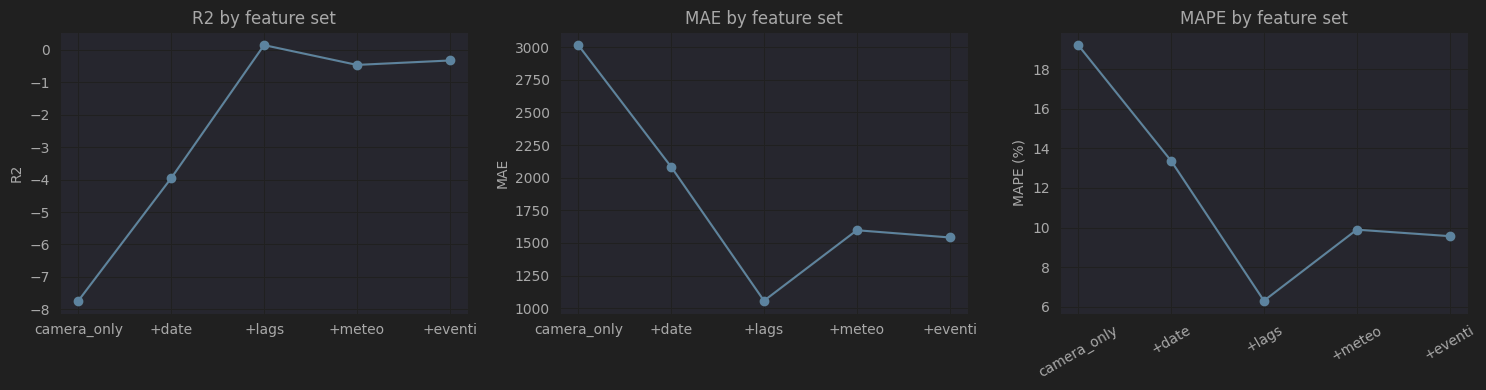

- Baseline

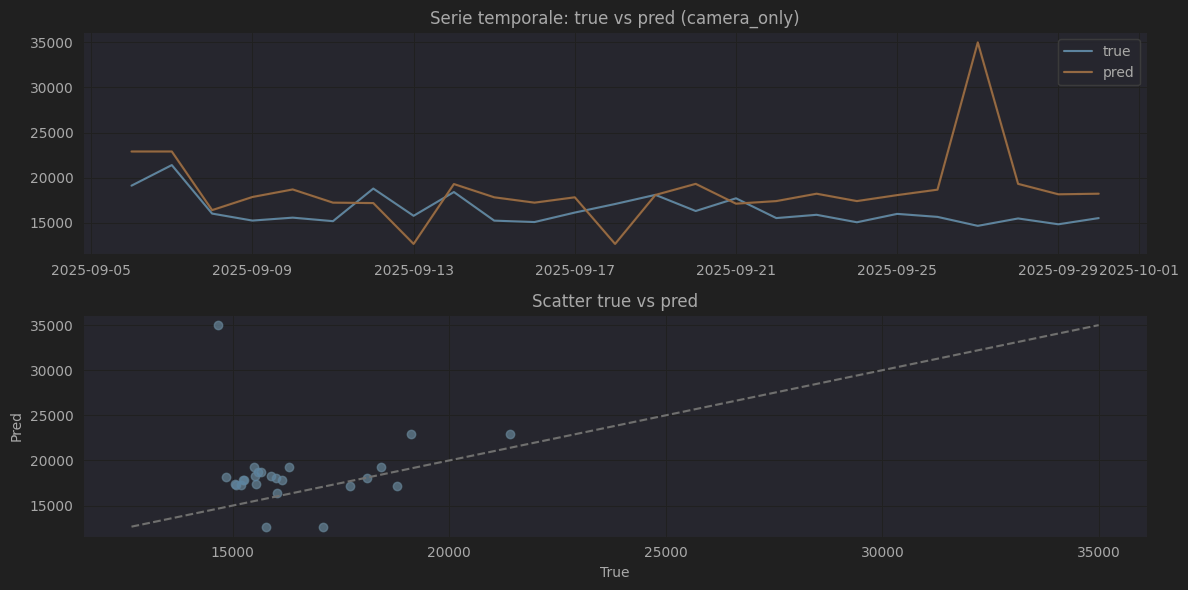

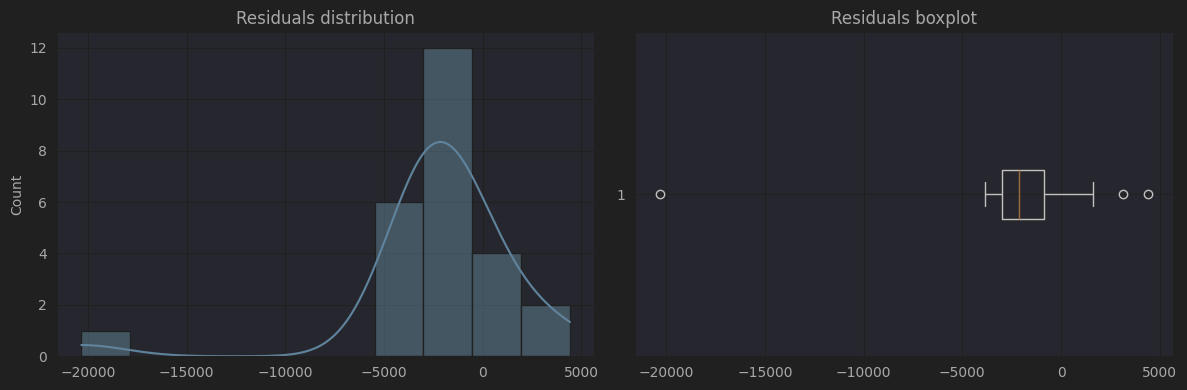

- Modello migliore (baseline + date + lags)

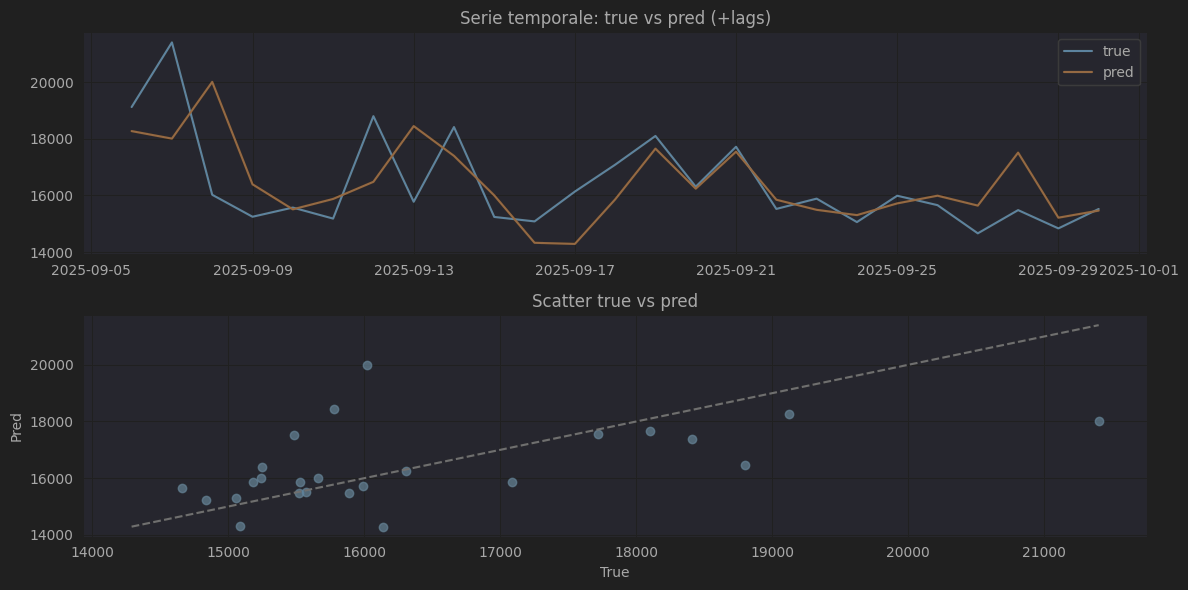

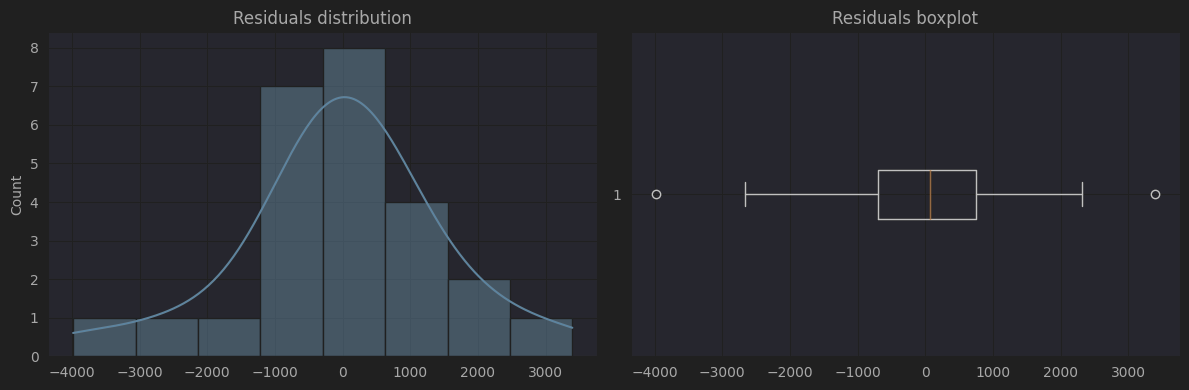

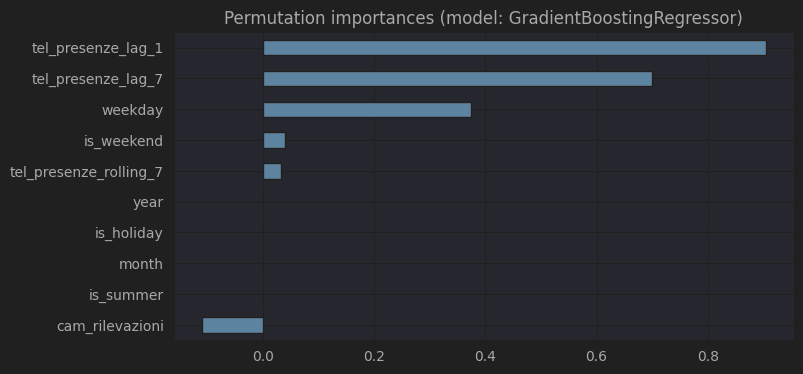

- Modello con tutte le feature

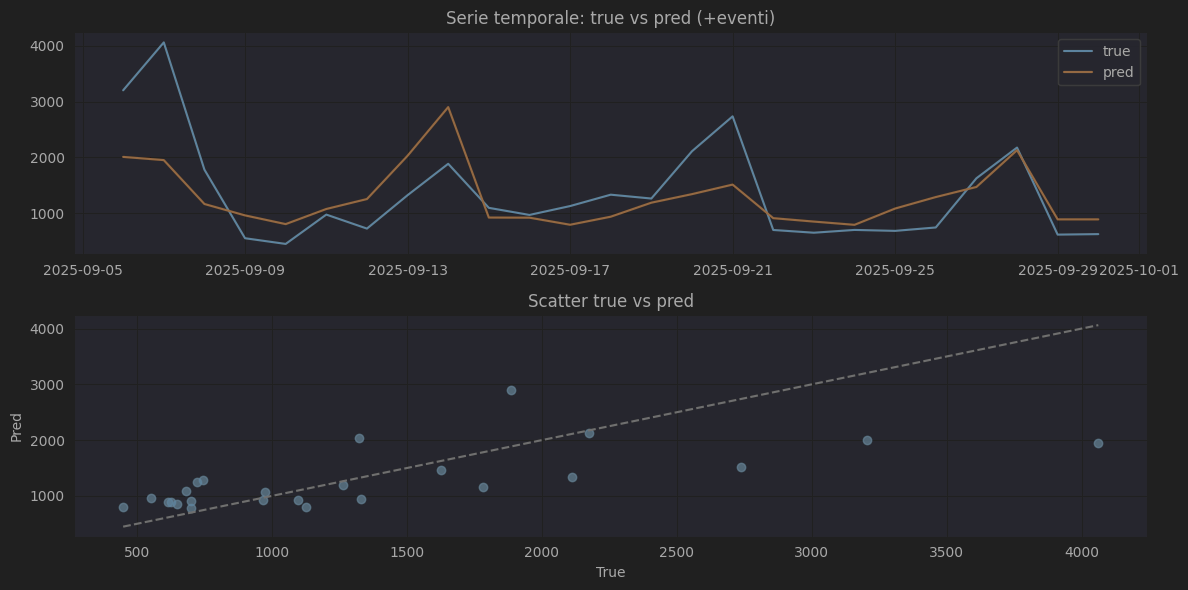

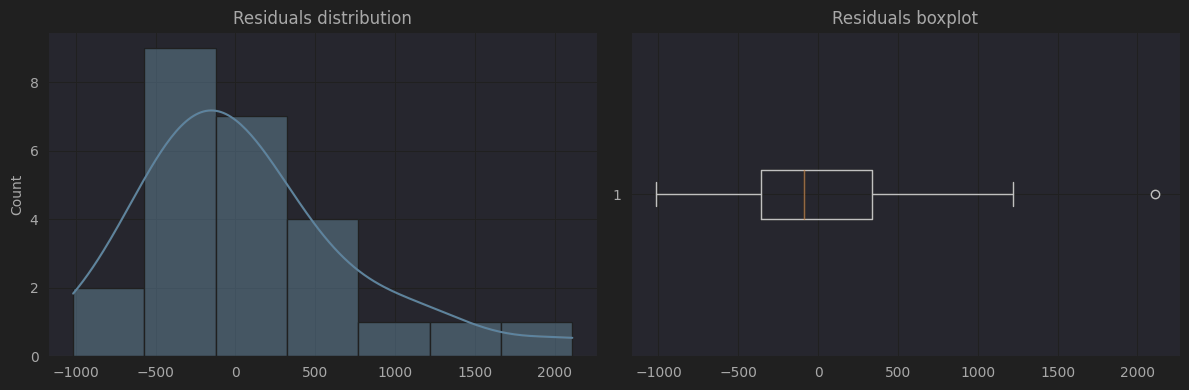

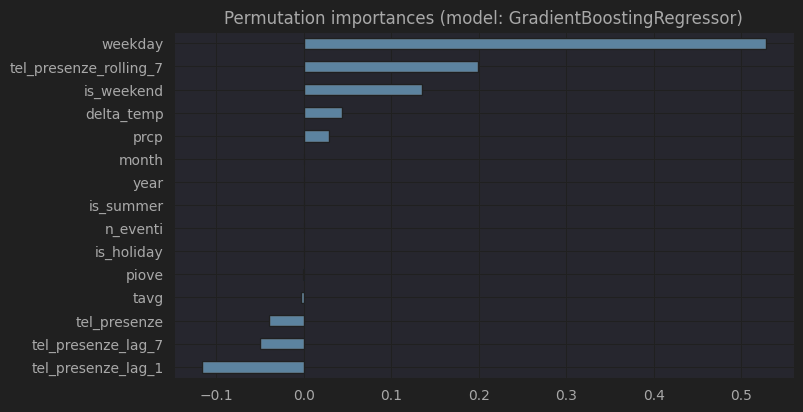

In generale, si nota un modello buono nelle performance, con una modellazione stabile e corretta e una buona previsione dei trend, con una tendenza a sovrastimare o sottostimare picchi negativi o positivi all'interno dei dati. Il giorno della settimana e i lag telefonici rimangono tra le feature piu' importanti del dataset.

#### Dato telefonico -> rilevazioni telecamere
Anche in questo caso, l'aggiunta di una feature temporale aumenta di gran lunga le performance  del modello, che in generale si comporta abbastanza bene tranne per quanto riguarda numeri molto alti, talvolta sottostimati. Al contrario del modello precedente, l'aggiunta dei lag aiuta a diminuire il MAPE, ma si ha un aumento dell'R². Questo vale a dire che aiutano a ridurre l'errore ma non la capacita' del modello di spiegare la variabilita' complessiva del target. Il meteo invece diventa molto utile, migliorando il modello in entrambe le situazioni. Aggiungere gli eventi invece non aggiunge molte informazioni, a prova del fatto che la codifica attuale rimane poco utile.

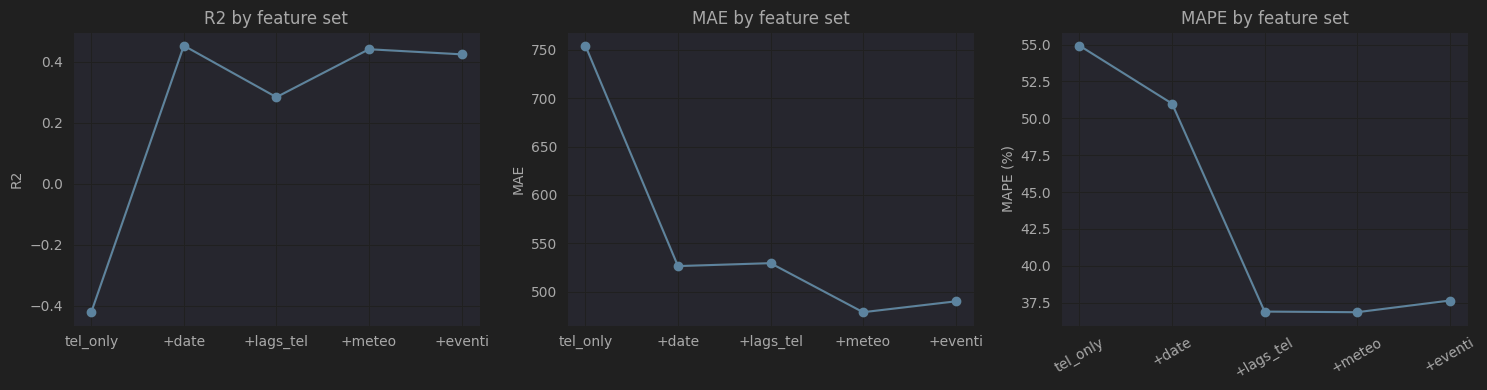

- Baseline

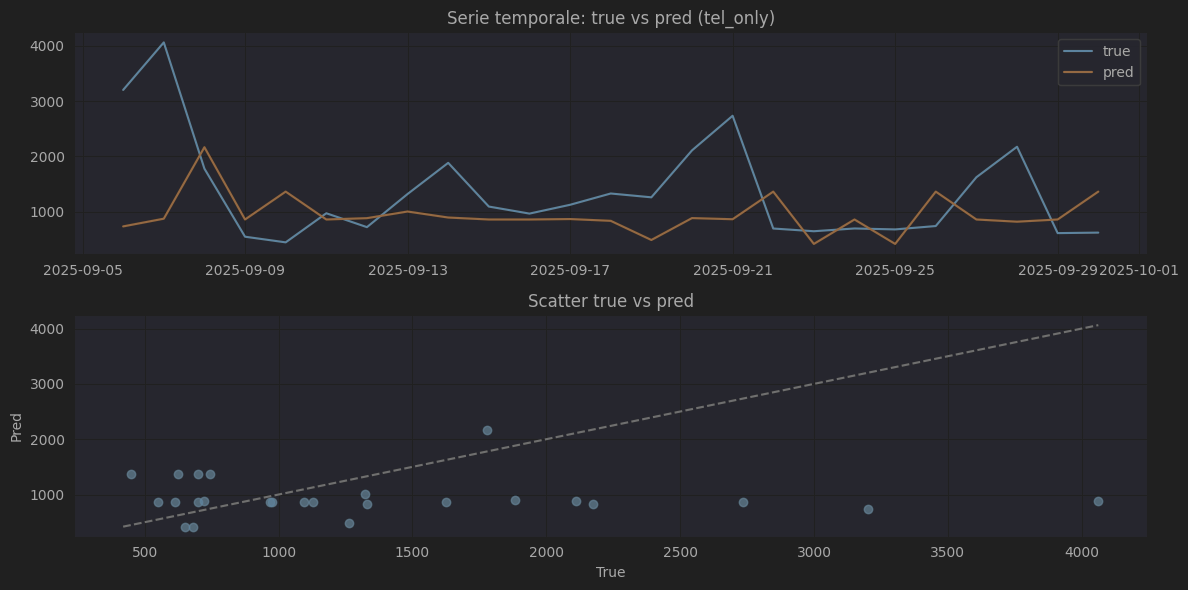

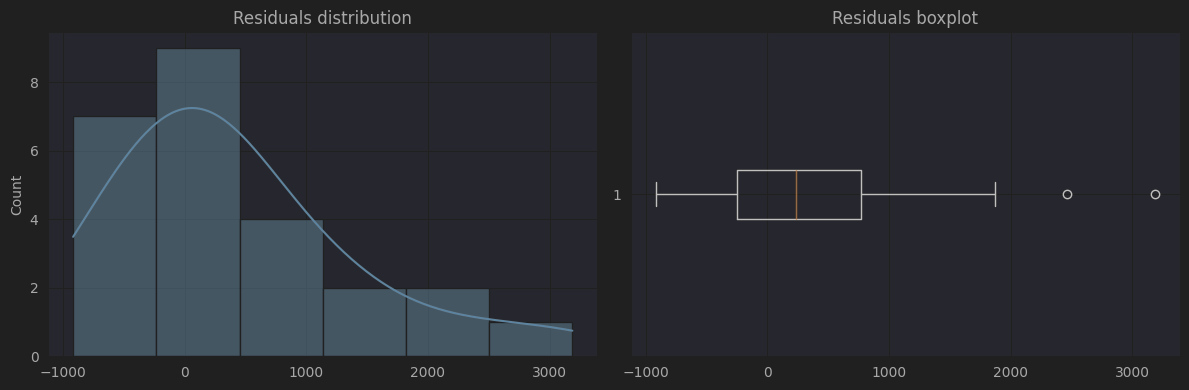

- Modello migliore (+date+meteo)

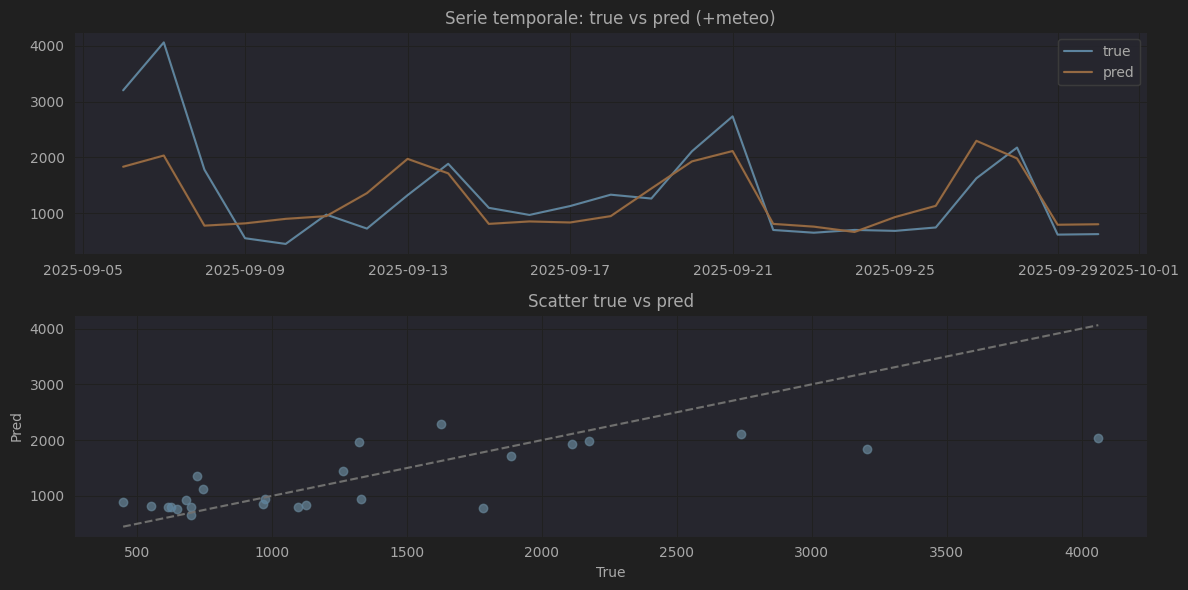

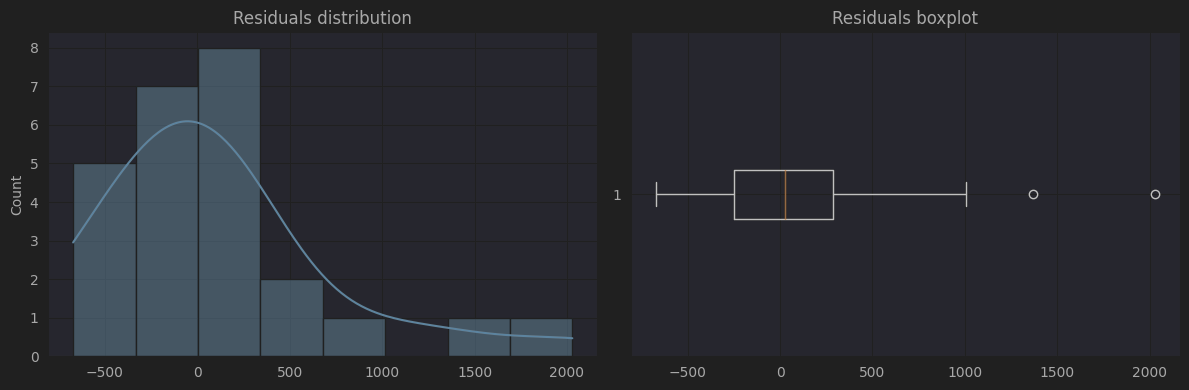

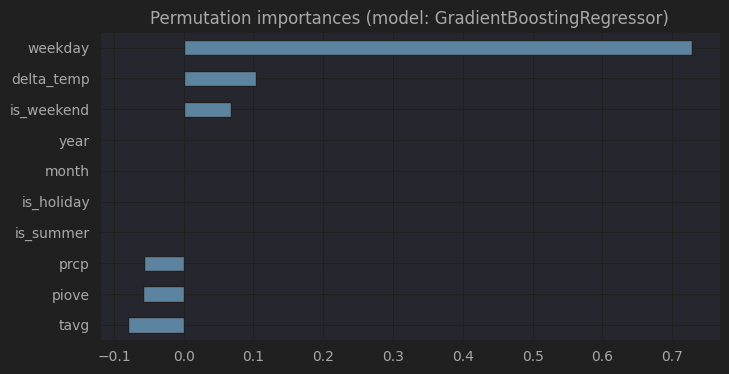

- Modello con tutte le feature

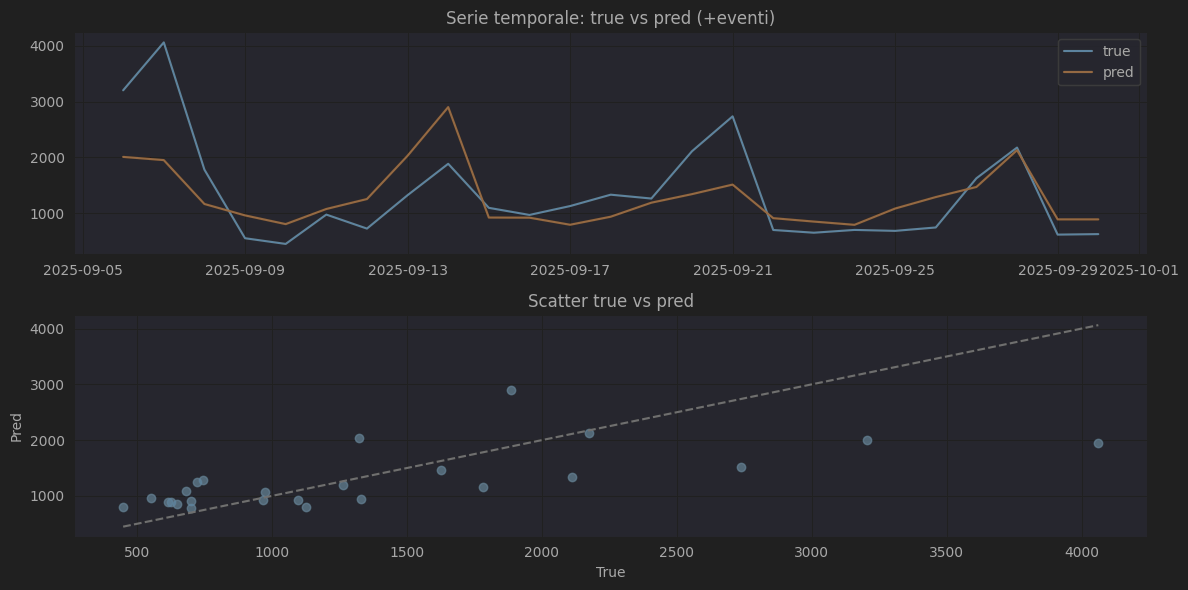

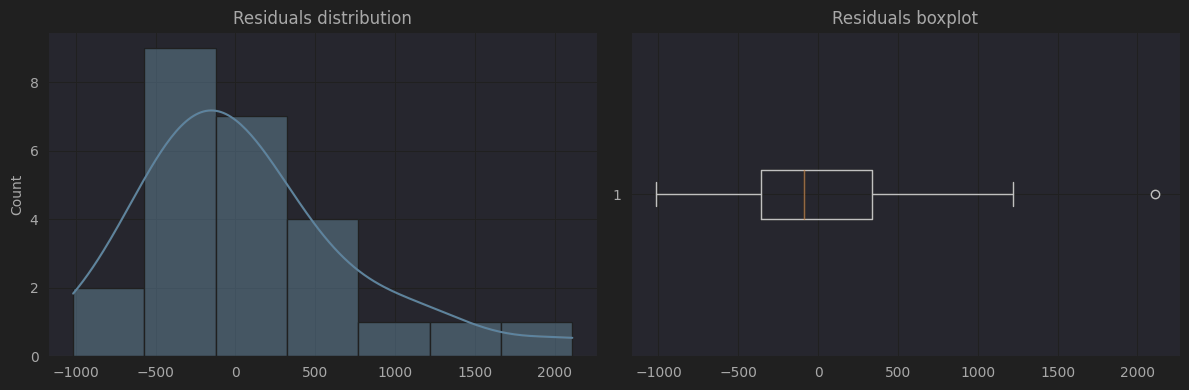

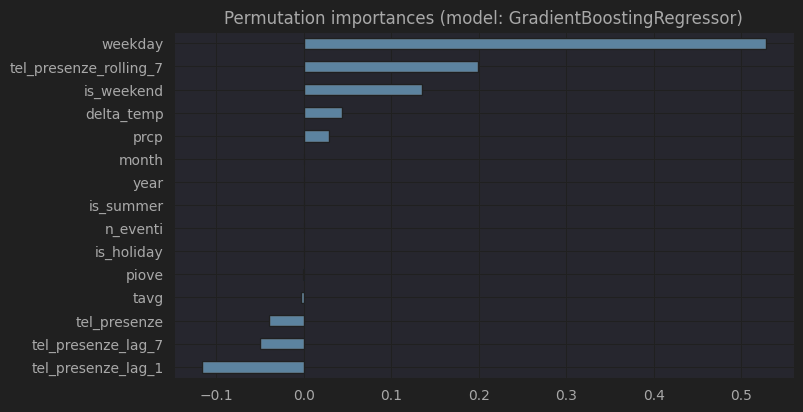

In generale, il modello segue abbastanza bene l'andamento generale della serie, con una tendenza a sottostimare i picchi. Le previsioni dipendono quasi esclusivamente dal giorno della settimana, con le altre feature ad avere un impatto relativamente limitato sul modello. Servirebbero informazioni piu' forti per avere una migliore previsione dei picchi.